In [1]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

### Setting GPU memory consumption growth in order to avoid OOM errors

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')
for i in gpu:
    tf.config.experimental.set_memory_growth(i , True)

### Check is the GPU available or not

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load Image into TF Data Pipeline

In [15]:
images = tf.data.Dataset.list_files("data\\images\\*.jpg")
# Check if the above path is working or not
images.as_numpy_iterator().next()

b'data\\images\\1310eb0b-14ef-11ed-b43a-44af28ba59f9.jpg'

In [16]:
def loadImage(x):
    byteImg = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byteImg)
    return img

In [17]:
images = images.map(loadImage)
images.as_numpy_iterator().next()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [184, 146, 123],
        [181, 143, 120],
        [180, 142, 119]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [185, 147, 124],
        [184, 146, 123],
        [184, 146, 123]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [186, 148, 125],
        [187, 149, 126],
        [188, 150, 127]],

       ...,

       [[211, 169,  93],
        [195, 153,  77],
        [195, 156,  79],
        ...,
        [207, 208, 226],
        [167, 168, 186],
        [124, 125, 143]],

       [[239, 203, 143],
        [248, 209, 150],
        [239, 199, 138],
        ...,
        [138, 140, 155],
        [148, 150, 165],
        [185, 187, 202]],

       [[111,  78,  27],
        [177, 141,  89],
        [204, 163, 111],
        ...,
        [187, 189, 204],
        [240, 242, 255],
        [236, 238, 253]]

### View images with matplotlib

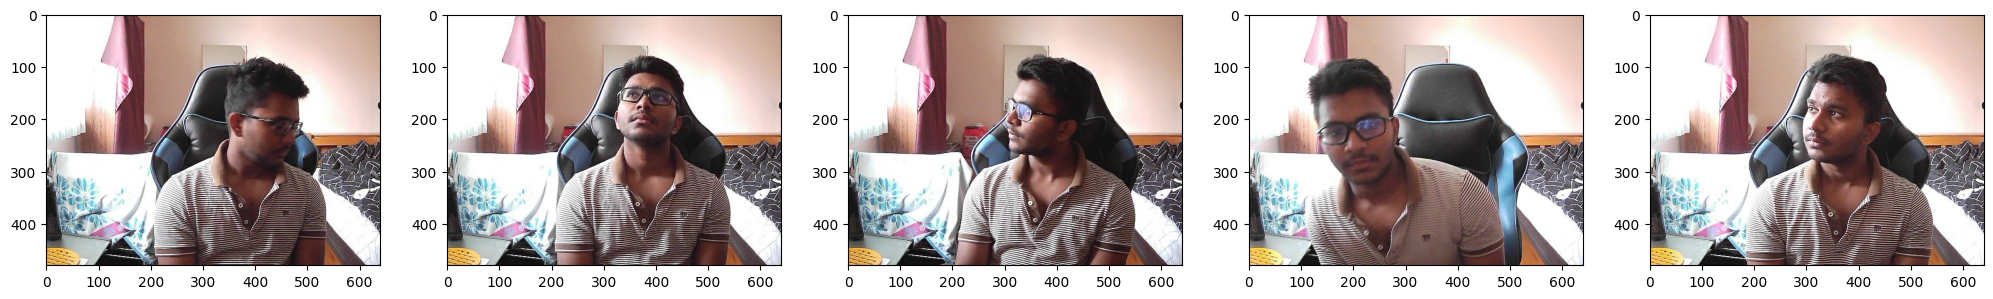

In [24]:
imageGenerator = images.batch(5).as_numpy_iterator()
plot_images = imageGenerator.next()

fig , ax = plt.subplots(ncols=5 , figsize=(25 , 25))
for i , img in enumerate(plot_images):
    ax[i].imshow(img)
plt.show()

### Partition Unaugmented Data